# Step 3 - Apply the Components into the Pattern

# Imports

In [12]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np

from sklearn import neighbors, datasets

In [2]:
# magic  
%matplotlib inline 

# Let's Plug the Components into the Pattern

In [18]:
from yellowbrick.base import Visualizer

class DecisionBoundariesVisualizer(Visualizer):
    """
    """

    def __init__(self, 
                 model, 
                 step_size=0.02, 
                 light_colors=['#FFAAAA', '#AAFFAA', '#AAAAFF'], 
                 bold_colors=['#FF0000', '#00FF00', '#0000FF'],  
                 *args, 
                 **kwargs):
        
        super(DecisionBoundariesVisualizer, self).__init__(*args, **kwargs)

        self.estimator = model
        self.step_size = step_size

        self.light_colors = light_colors
        self.bold_colors = bold_colors


    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        self.xx, self.yy = np.meshgrid(np.arange(x_min, x_max, step_size),
                             np.arange(y_min, y_max, step_size))
        self.Z = self.estimator.predict(np.c_[self.xx.ravel(), self.yy.ravel()])
        self.Z = self.Z.reshape(self.xx.shape)
        
        return self

    def draw(self, X, y=None, **kwargs):
        cmap_light = ListedColormap(self.light_colors)
        cmap_bold = ListedColormap(self.bold_colors)

        self.ax.pcolormesh(self.xx, self.yy, self.Z, cmap=cmap_light)

        self.ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                    edgecolor='k', s=20)
        
        # different method for setting xlim, ylim
        self.ax.set_xlim(self.xx.min(), self.xx.max())
        self.ax.set_ylim(self.yy.min(), self.yy.max())

    def finalize(self, **kwargs):
        self.set_title('Boundaries Visualiation')
        # Add the legend
        self.ax.legend(loc='best', frameon=True)
        
        self.ax.set_xlabel('X Label')
        self.ax.set_ylabel('Y Label')
        
    def fit_draw_poof(self, **kwargs):
        self.fit(X=X, y=y)
        self.draw(X=X, y=y)
        self.poof()
        

# Input Data

In [21]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

# Model

In [19]:
n_neighbors = 15
weights = 'uniform'
model = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

# Let's Run This Visualizer

No handles with labels found to put in legend.


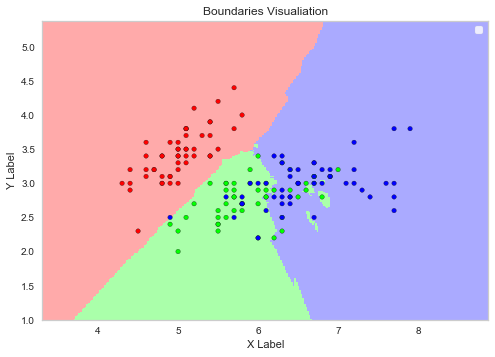

In [20]:
oz = DecisionBoundariesVisualizer(model)
oz.fit_draw_poof(X=X, y=y)

# Yes, it works! I'm so smart!

# Let's Simply Test That This Works With Another Model

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

No handles with labels found to put in legend.


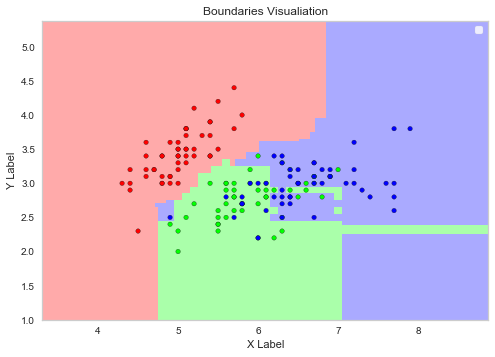

In [15]:
oz = DecisionBoundariesVisualizer(model, step_size=step_size, light_colors=light_colors, bold_colors=bold_colors)
oz.fit_draw_poof(X=X, y=y)